In [805]:
import os
import settings
import pandas as pd
import numpy as np
import operator
import graphviz
from sklearn.tree import export_graphviz

from sklearn.tree import DecisionTreeRegressor

In [809]:
def read_data():
    df = pd.read_excel(os.path.join(settings.PROCESSED_DIR, "all_with_liwc_segmented.xls"), encoding="ISO-8859-1")
    return df

def sort_important_features(df):
    dt = DecisionTreeRegressor()
    predictors = df.columns.tolist()
    predictors = [p for p in predictors if p not in settings.NON_PREDICTORS]
    model = dt.fit(df[predictors], df[settings.TARGET])
    predictions = dt.predict(df[predictors])
    results = {name: score for name, score in zip(predictors, dt.feature_importances_)}
    sorted_results = sorted(results.items(), key=operator.itemgetter(1), reverse=True)
    for feat, importance in sorted_results:
        print('feature: {f}, importance: {i}'.format(f=feat, i=importance))
    accuracy = dt.score(df[predictors], df[settings.TARGET])
    print("Accuracy: {}".format(accuracy))
    return model

    

In [810]:
df = read_data()

In [811]:
model = sort_important_features(df)

feature: leisure, importance: 0.08562848501347041
feature: negemo_change_q, importance: 0.06309343600205757
feature: money, importance: 0.06298536423779297
feature: focuspresent, importance: 0.04260098335370242
feature: i, importance: 0.03947859765451506
feature: quant, importance: 0.032881428227086944
feature: anger_1h, importance: 0.030735167209400633
feature: anger_1q, importance: 0.030717573795733324
feature: risk, importance: 0.02693415548907284
feature: certain, importance: 0.025979891302784226
feature: bio, importance: 0.025287055203242086
feature: posemo_change_h, importance: 0.021261694073581996
feature: ipron, importance: 0.02043619328983069
feature: negate, importance: 0.019112590212603586
feature: relig, importance: 0.01855737556749471
feature: cogproc, importance: 0.016748728923023908
feature: discrep, importance: 0.01628059205412009
feature: filler, importance: 0.015993056808912973
feature: article, importance: 0.01574146906695915
feature: cause, importance: 0.01532507961

In [812]:
def print_tree(model):
    predictors = df.columns.tolist()
    features = [p for p in predictors if p not in settings.NON_PREDICTORS]
    data = export_graphviz(model, out_file=None, feature_names=features)
    graph = graphviz.Source(data)
    graph.render(view=True)

In [764]:
print_tree(model)

In [813]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


def sort_important_features(df):
    rf = RandomForestRegressor()
    predictors = df.columns.tolist()
    predictors = [p for p in predictors if p not in settings.NON_PREDICTORS]
    model = rf.fit(df[predictors], df[settings.TARGET])
    predictions = rf.predict(df[predictors])
    importances = rf.feature_importances_
    
    results = {name: score for name, score in zip(predictors, importances)}
    sorted_results = sorted(results.items(), key=operator.itemgetter(1), reverse=True)
    for feat, importance in sorted_results:
        print('feature: {f}, importance: {i}'.format(f=feat, i=importance))
    accuracy = rf.score(df[predictors], df[settings.TARGET])
    print("Accuracy: {}".format(accuracy))
    names = [k[0] for k in sorted_results]
    return model, importances, names

def plot_feature_importances(df, importances, names):
    reversed_names = names[::-1]
    predictors = df.columns.tolist()
    predictors = [p for p in predictors if p not in settings.NON_PREDICTORS]
    features = predictors
    indices = np.argsort(importances)
    
    plt.figure(figsize=(30,30))
    matplotlib.rcParams.update({'font.size': 22})
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)),reversed_names)
    plt.xlabel('Relative Importance')
    plt.show()

In [814]:
rf, importances, names = sort_important_features(df)

feature: money, importance: 0.05593634234248129
feature: risk, importance: 0.03647515291752901
feature: home, importance: 0.032033248585796245
feature: conj, importance: 0.030787213065593184
feature: focuspresent, importance: 0.025380519671108197
feature: ipron, importance: 0.024974351188299233
feature: negate, importance: 0.024912911433995464
feature: Moral, importance: 0.02393824707655147
feature: informal, importance: 0.02210755044850343
feature: posemo_change_h, importance: 0.02189876703350304
feature: we, importance: 0.019824038865731586
feature: affect_1q, importance: 0.01689510270257489
feature: time, importance: 0.016535908758295977
feature: AuthorityVirtue, importance: 0.016204000135763858
feature: anx_2q, importance: 0.015549504848452375
feature: i, importance: 0.015486349257284527
feature: MoralityGeneral, importance: 0.014860939838949167
feature: negemo_1q, importance: 0.014557486235072078
feature: adverb, importance: 0.014365854978623218
feature: they, importance: 0.013639

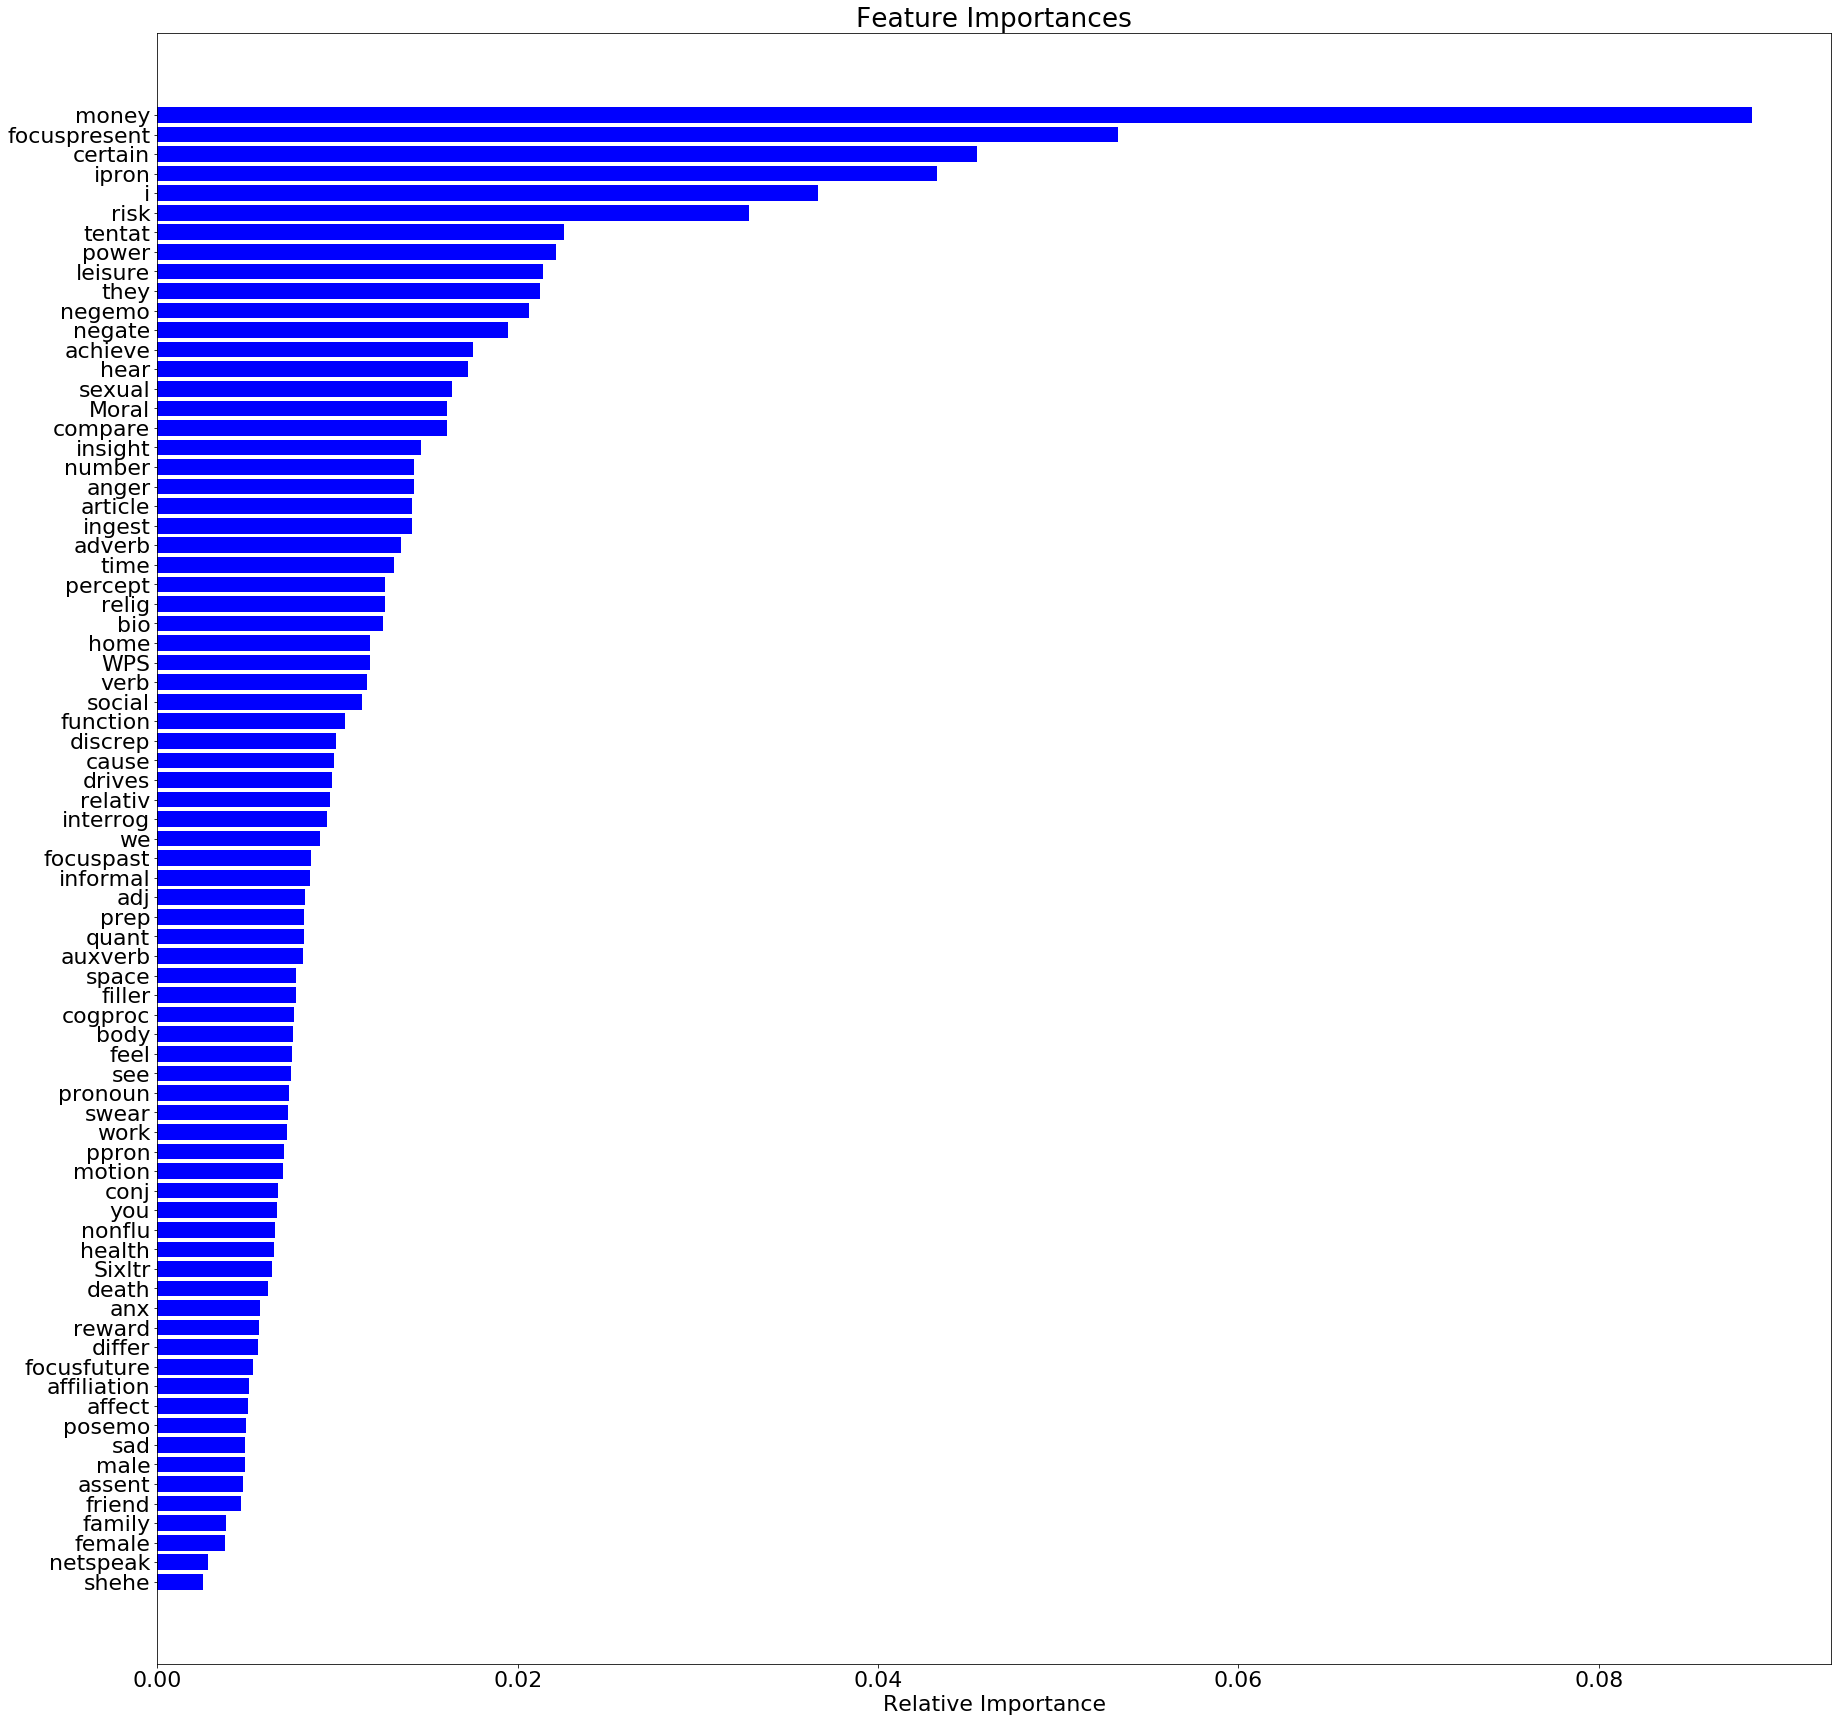

In [798]:
plot_feature_importances(df, importances, names)

## Create Linear Model Using Features with High Importance

In [156]:
import os
import settings
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


def read_data():
    df = pd.read_excel(os.path.join(settings.PROCESSED_DIR, "all_with_liwc_segmented.xls"), encoding="ISO-8859-1")
    return df



In [823]:
def create_summary(df):
    lr = LinearRegression()
    predictors = df.columns.tolist()
    predictors = ['i', 'negate', 'posemo_2h','anx_1q', 'interrog','negemo','risk', 'see', 'money', 'Moral', 'focuspresent', 'quant']
    lr.fit(df[predictors], df['norm_persuasive'])

    X = df[predictors]
    X2 = sm.add_constant(X)
    est = sm.OLS(df['norm_persuasive'], X2)
    est2 = est.fit()
    print(est2.summary())

In [824]:
df = read_data()
create_summary(df)

                            OLS Regression Results                            
Dep. Variable:        norm_persuasive   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     38.34
Date:                Fri, 12 Jan 2018   Prob (F-statistic):           9.61e-83
Time:                        17:32:46   Log-Likelihood:                -15521.
No. Observations:                2406   AIC:                         3.107e+04
Df Residuals:                    2393   BIC:                         3.114e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -68.2717     22.839     -2.989   